Importaciones

In [8]:
#librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# valiables de entorno
from config import * 

Definir estilos para grafica

In [9]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= 'x-small')    # fontsize of the tick labels
plt.rc('ytick', labelsize= 'x-small')    # fontsize of the tick labels
plt.rc('legend', fontsize= 'x-small')    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

Connection a BD

In [10]:
strConexion = f"mysql+mysqldb://{mySqlUser}:{mySqlPassword}@{mySqlHost}/{mySqlBd}"
engine = create_engine(strConexion)

Consulta a BD (ciudades, años, cantidad de abusos)

In [15]:
query = "call listar_ciudades_anio_conteo();"
frame = pd.read_sql_query(query, engine)

Grafica de lineas

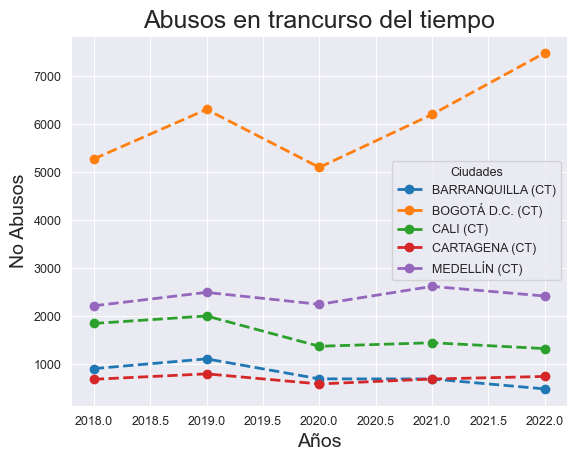

In [16]:
# agrega headerss
lineplot =pd.concat([frame])[['municipio', 'anio', 'conteo']]
# Filtrado ciudades unicas
citys = [fila[0] for fila in frame.values.tolist()]
list_citys = []
for element in citys:
    if( element not in list_citys):
      list_citys.append(element)

#top 5 ciudades
list_citys = list_citys[:5]

# preparacion para listar
lineplot = lineplot[lineplot['municipio'].isin(list_citys)]
lineplot = lineplot.pivot(index='municipio', columns='anio' ,values='conteo').T

# extraccion de columnas para label
labels = lineplot.columns

lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('anio')

# # plotting
plt.plot(lineplot, 'o--', linewidth=2)
#customization
# plt.xticks([2018, 2019, 2020, 2021, 2022, 2023])
plt.xlabel('Años')
plt.ylabel('No Abusos')
plt.title('Abusos en trancurso del tiempo')
plt.legend(title='Ciudades', title_fontsize = 'x-small',  fontsize= 'x-small', labels=labels)
plt.show()



Consulta a BD (cantidad abusos a lo largo del tiempo)

In [13]:
query = "call listar_anio_conteo();"
frame = pd.read_sql_query(query, engine)

Grafica Dispersion

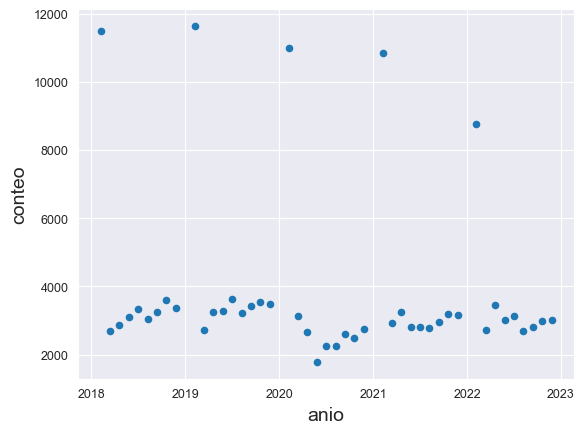

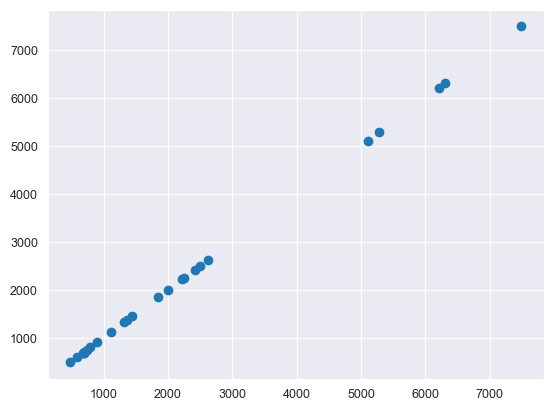

In [14]:


p = frame[['anio', 'conteo']]
p.plot.scatter(x='anio',y='conteo')

plt.show()
# lineplot =pd.concat([frame])[['municipio', 'anio', 'conteo']]
# frame = frame.pivot(index='municipio', columns='anio' ,values='conteo').T
dataframe1 = p.std(axis= 1)
# print(dataframe1.values)
plt.scatter(lineplot.values, lineplot.values)
plt.show()